# Linear Regression with Batch Gradient Descent

You will train your model using a real world dataset.  The dataset contains a collection of real estate listings in San Luis Obispo county.

The model predict the price given the square footage of the house.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import numpy.matlib
import matplotlib.pyplot as plt

# read dataset
df = pd.read_csv("/content/drive/MyDrive/COEN_240_pujithakallu/project_1/housing_price_data.csv")

df.head()

,MPLS,Price,Bedrooms,Bathrooms,Size,PriceSq
0,132842,795000,3,3,2371,335.30
1,134364,399000,4,3,2818,141.59
2,135141,545000,4,3,3032,179.75
3,135712,909000,4,4,3540,256.78
4,136282,109900,3,1,1249,87.99


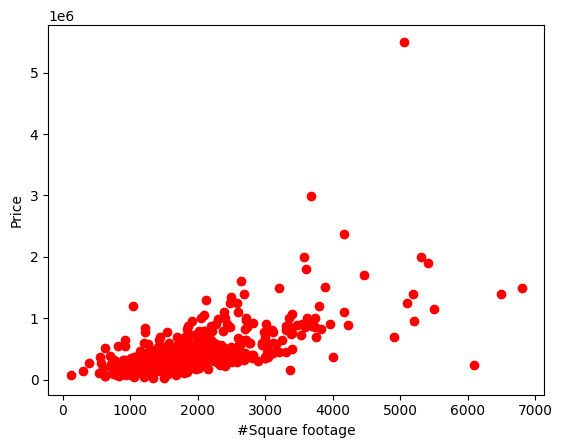

In [4]:
# Plot data points
X, y = (df["Size"].values,df["Price"].values)
X = X.reshape(len(X),1)
y = y.reshape(len(y),1)

# plots the data points
plt.plot(X, y, 'ro')
plt.xlabel("#Square footage")
plt.ylabel("Price")
plt.show()

In [5]:
# Normalize the house size, e.g., subtract min and divide by (max-min) to ensure
# the scale is compatible with the bias, which is 1
max_min = X.max(0) - X.min(0)
Xmin = X.min(0)
X = (X-Xmin) / max_min

# Add bias
z=np.ones((len(X),1))
X = X.reshape(len(X),1)
X = np.concatenate((z,X), axis=1)
y = y.reshape(len(X),1)

# sort for testing/plotting
Xsort = np.sort(X, axis=0)

print(X.shape)
print(y.shape)

# For non-vectorized
X_train = X[:,1]
y_train = y

(781, 2)
(781, 1)


## Complete this code

In [21]:
# Initialize the weight vector w
w = np.random.rand(2, 1)

# Learning rate
nu = 0.5

# Number of epochs
MAX_EPOCHS = 2000

# List to store Mean Squared Error (MSE) values for each epoch
mse_array = []

# Loop for 2000 epochs
for itr in range(MAX_EPOCHS):
    # Form the matrix W by replicating the weight vector w across rows of X
    W = np.matlib.repmat(w.transpose(), len(X), 1)

    # Compute predictions
    predictions = np.sum(np.multiply(W, X), axis=1, keepdims=True)

    # Compute error
    errors = predictions - y

    # Update weight vector w using gradient descent
    w = w - nu * np.transpose(np.mean(np.multiply(errors, X), axis=0, keepdims=True))

    # Compute Mean Squared Error (MSE)
    yhat = np.dot(X, w)
    mse = (np.sum((yhat - y) ** 2) / (2 * len(y)))

    # Store MSE results for the plot
    mse_array.append(mse)



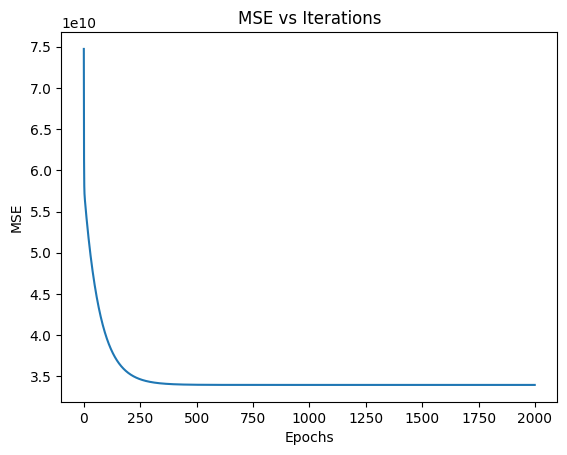

Final MSE: 33955048432.560646


In [22]:
# Plot MSE vs iterations
plt.plot(mse_array)
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.title("MSE vs Iterations")
plt.show()

# Print the last MSE value
print("Final MSE:", mse)


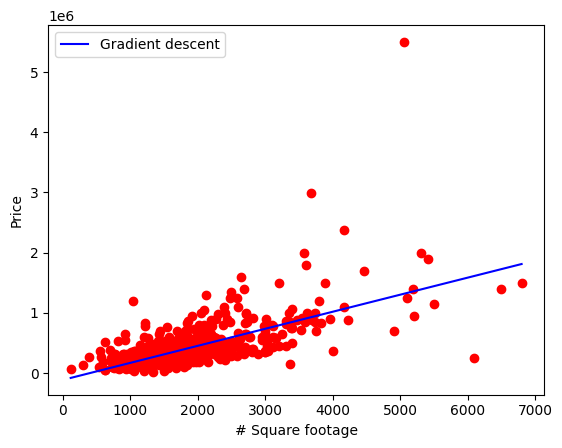

In [25]:
### Plot the fitted curve

yhat = np.dot(np.sort(X, axis=0),w)

plt.plot(X[:,1] * max_min + Xmin, y, 'ro')
plt.plot(Xsort[:,1] *max_min + Xmin, yhat, 'b', label="Gradient descent")
plt.legend()
plt.xlabel("# Square footage")
plt.ylabel("Price")
plt.show()

In [26]:
print (w)

[[ -79538.70643904]
 [1891037.10264448]]


In [28]:
### Predict the price of a 5000 sqft house
### Remember to normalize it first
sqft = 5000
norm_sqft = (sqft - Xmin)/max_min
print(w[0] + norm_sqft*w[1])

[1301937.50028328]
